In [274]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics 

from matplotlib import pyplot as plt
import seaborn as sns

from ipywidgets import interactive
from IPython.display import SVG,display
from itertools import cycle

import numpy as np

In [275]:
df = pd.read_csv('./keys.csv',';')
df

,Z,CODFAZENDA,SIGLA_FAZENDA,SIGLA_PROJETO,CODTALHAO,SIGLA_TALHAO,AREA_TALHAO,CICLO,ROTACAO,ESPACAMENTO,...,FALHA_PERC,QUEBRADAS_PERC,TOMBADAS_PERC,CHOVEU?,QUANTO?,C.DIA ANT?,C.DIA POST?,C.3 DIAS A?,C.3 DIAS D?,ARM/CAD
0,1,1,AFA,AFA 2013,1,1,"50,79",1,1,"3,45 X 2,35",...,"2,04",0,0,N,0,N,N,S,N,2
1,2,1,AFA,AFA 2013,1,1,"50,79",1,1,"3,45 X 2,35",...,"2,04",0,0,S,3,S,S,S,S,3
2,3,1,AFA,AFA 2013,1,1,"50,79",1,1,"3,45 X 2,35",...,"2,04",0,0,S,1,S,S,S,S,2
3,4,1,AFA,AFA 2013,1,1,"50,79",1,1,"3,45 X 2,35",...,"2,04",0,0,S,2,S,S,S,S,2
4,5,1,AFA,AFA 2013,1,1,"50,79",1,1,"3,45 X 2,35",...,"2,04",0,0,N,0,N,S,S,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8216,10076,20,MDA,MDA 2013,533,11,"49,18",1,1,"3,45 X 2,35",...,"6,33",0,0,S,2,S,S,S,S,4
8217,10077,20,MDA,MDA 2013,533,11,"49,18",1,1,"3,45 X 2,35",...,"6,33",0,0,S,2,S,N,S,S,2
8218,10078,20,MDA,MDA 2013,533,11,"49,18",1,1,"3,45 X 2,35",...,"6,33",0,0,N,0,S,S,S,S,4
8219,10080,20,MDA,MDA 2013,533,11,"49,18",1,1,"3,45 X 2,35",...,"6,33",0,0,S,1,S,S,S,S,2


In [276]:
df1=df.query("CODFAZENDA=='2'")

In [277]:
df1

,Z,CODFAZENDA,SIGLA_FAZENDA,SIGLA_PROJETO,CODTALHAO,SIGLA_TALHAO,AREA_TALHAO,CICLO,ROTACAO,ESPACAMENTO,...,FALHA_PERC,QUEBRADAS_PERC,TOMBADAS_PERC,CHOVEU?,QUANTO?,C.DIA ANT?,C.DIA POST?,C.3 DIAS A?,C.3 DIAS D?,ARM/CAD
225,268,2,CPQ,CPQ 2016,19,1,"46,79",1,1,"3,45 X 2,35",...,"0,88","1,88",0,S,1,N,S,S,S,3
226,269,2,CPQ,CPQ 2016,19,1,"46,79",1,1,"3,45 X 2,35",...,"0,88","1,88",0,S,1,N,N,S,N,3
227,270,2,CPQ,CPQ 2016,19,1,"46,79",1,1,"3,45 X 2,35",...,"0,88","1,88",0,S,1,S,S,S,S,5
228,271,2,CPQ,CPQ 2016,19,1,"46,79",1,1,"3,45 X 2,35",...,"0,88","1,88",0,N,0,N,N,S,N,3
229,272,2,CPQ,CPQ 2016,19,1,"46,79",1,1,"3,45 X 2,35",...,"0,88","1,88",0,N,0,N,S,S,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,1626,2,CPQ,CPQ 2016,86,68,"31,35",1,1,"3,45 X 2,35",...,"1,92","3,37","13,33",N,0,N,S,S,S,3
1221,1627,2,CPQ,CPQ 2016,86,68,"31,35",1,1,"3,45 X 2,35",...,"1,92","3,37","13,33",S,1,S,S,S,S,4
1222,1628,2,CPQ,CPQ 2016,86,68,"31,35",1,1,"3,45 X 2,35",...,"1,92","3,37","13,33",S,3,S,S,S,S,4
1223,1630,2,CPQ,CPQ 2016,86,68,"31,35",1,1,"3,45 X 2,35",...,"1,92","3,37","13,33",N,0,N,N,S,N,5


In [278]:
df.rename(columns={
        "CHOVEU?": "CHOVEU",
        "QUANTO?":"QUANTO",
        "C.DIA ANT?":"C_DIA_ANT",
        "C.DIA POST?":"C_DIA_POST",
        "C.3 DIAS A?":"C_3_DIAS_A",
        "C.3 DIAS D?":"C_3_DIAS_D"
}, inplace = True)

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8221 entries, 0 to 8220
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Z                         8221 non-null   int64  
 1   CODFAZENDA                8221 non-null   int64  
 2   SIGLA_FAZENDA             8221 non-null   object 
 3   SIGLA_PROJETO             8221 non-null   object 
 4   CODTALHAO                 8221 non-null   int64  
 5   SIGLA_TALHAO              8221 non-null   object 
 6   AREA_TALHAO               8221 non-null   object 
 7   CICLO                     8221 non-null   int64  
 8   ROTACAO                   8221 non-null   int64  
 9   ESPACAMENTO               8221 non-null   object 
 10  SIGLA_MAT_GEN             8221 non-null   object 
 11  DATA_PLANTIO              8221 non-null   object 
 12  MES_PLANTIO               8221 non-null   object 
 13  ANO_PLANTIO               8221 non-null   int64  
 14  DESC_GRP

#### converterndo mes descritivo para numero relacionado ex: jan = 1, feb=2 e etc...

In [280]:
df["MES_PLANTIO"]=df['DATA_PLANTIO'].apply(lambda x: int(x[3:5]))

In [281]:
df["MES_ATIVIDADE_REALIZ"]=df['DATA_ATIVIDADE_REALIZ'].apply(lambda x: int(x[3:5]))

### Retirando colunas

In [282]:
df = df.drop(columns=["Z"
                      ,"SIGLA_FAZENDA"
                      ,"SIGLA_TALHAO"
                      ,"DATA_PLANTIO"
                      ,"ANO_PLANTIO"
                      ,"COD_ATIVIDADE"
                      ,"MODO_DE_OPERACAO"
                      ,"MODO_DE_APLICACAO"
                      ,"MODO_DE_ACAO"
                      ,"QTDE_REALIZADA_ATIVIDADE"
                      ,"DATA_ATIVIDADE_REALIZ"
                      ,"ANO_ATIVIDADE_REALIZ"
                      ,"DIAS_REF_PLANTIO_REALIZ"
    ,"ROTACAO"
    ,"CICLO"
])

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8221 entries, 0 to 8220
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CODFAZENDA               8221 non-null   int64 
 1   SIGLA_PROJETO            8221 non-null   object
 2   CODTALHAO                8221 non-null   int64 
 3   AREA_TALHAO              8221 non-null   object
 4   ESPACAMENTO              8221 non-null   object
 5   SIGLA_MAT_GEN            8221 non-null   object
 6   MES_PLANTIO              8221 non-null   int64 
 7   DESC_GRP_ATIVIDADE       8221 non-null   object
 8   NOME_ATIVIDADE           8221 non-null   object
 9   % AREA                   8221 non-null   object
 10  MES_ATIVIDADE_REALIZ     8221 non-null   int64 
 11  IDADE_TALHAO_ATIVIDADE   8221 non-null   object
 12  IDADE_TALHAO_INVENTARIO  8221 non-null   object
 13  AREA_INVENTARIO          8221 non-null   object
 14  IMA_TALHAO               8221 non-null  

### Funções

### Matriz de correlaçao

###### plota uma matriz de correlação e retorna um dataframe das correlações

In [284]:
def matrizCorrelacao(df):
    n=df
    for col in df.keys():
        n[col],_ = converterDadosMatriz(n, col)
    corrmat = n.corr()
    fig = plt.figure(figsize = (35,35))
    sns.heatmap(corrmat,
                vmax = 1,
                square = True,
                annot = True,
                vmin = -1
               )
    plt.show()
    return corrmat

###### Ajuda a função matrizCorrelacao a tranformar os dados em numéricos para que se possa calcular a correlação

In [285]:
def converterDadosMatriz(n, col):
    return pd.factorize(n[col])

### Funções de padronização de dados

###### Esta função cria a base de dado com os dados que precisa, porém o target precisa estar por último

In [286]:
def criarBaseDados(df, colunas):
    df1=df[colunas]
    return df1

###### Converte os dados para número e cria um dicionário com os seguintes valores tagert que são os valores escritos de df e o valores com os números (obs: somente usado em dados categóricos nominais)

In [287]:
def converterDados(nome, df1):
    dados={}
    dados["target"]= df1[nome].unique()
    df1[nome],_=pd.factorize(df1[nome])
    dados["valores"]= df1[nome].unique()
    for x in range(len(dados["target"])):
        print("target: %s = %s" %(dados["target"][x],dados["valores"][x]))
    return dados   

#### Converter números com padrão usado no Brasil (Europeu)  para padrão Americano que é compreendido pelo Python
#### Ex.: 17,12 para 17.12

In [288]:
def converterDadosB(df1, coluna):
    df1[coluna]=df1[coluna].apply(lambda x: str(x).replace(",","."))
    df1[coluna]= df1[coluna].astype("float64")

### Funções que criam teste e treinamento

##### Função que cria teste e treinamento supervisionado
###### Cria os dados de teste e de treinamento com a porcentagem de 30% para teste com um target

In [289]:
def criarTesteTreinamento(target, df1):
    dados={}
    ##Separa os dados do target
    feature_cols = df1.keys()
    x_train = df1[feature_cols[:-1]]
    y_train = df1[target]
    
    ## criar ambiente de teste
    x_train, x_test, y_train, y_test = train_test_split(
    x_train, y_train,test_size=0.3,random_state=1)
    
    dados["x_train"]=x_train
    dados["y_train"]=y_train
    dados["x_test"]=x_test
    dados["y_test"]=y_test
    return dados

#### Função que cria teste e treinamento não supervisionado
###### Cria os dados de teste e de treinamento com a porcentagem de 30% para teste sem um target

In [290]:
def criarTestTrainUnsupervised(df1):
    dados={}
    x_train = df1
    ## criar ambiente de teste
    x_train, x_test = train_test_split(
    x_train ,test_size=0.3,random_state=1)
    
    dados["x_train"]=x_train
    dados["x_test"]=x_test
    return dados

### Função da árvore de decisão

##### Funções não automatizadas

###### Treina a árvore e plota os resultados

In [291]:
def treinarPlotar(arvore, dados, target):
    #treina
    arvore = arvore.fit(dados["x_train"],dados["y_train"])
    #plota
    fig = plt.figure(figsize=(50,30))
    _= tree.plot_tree(arvore, feature_names=dados["x_train"].columns,class_names=target,
    filled=True, rounded=True)  
    fig.savefig("decisiontree.svg", format='svg',dpi=1200)

###### Verifica a árvore e mostra a acurácia (quanto maior melhor) e "amostra erroneamente" (quanto menor melhor).

In [292]:
def verificarArvore(dados, arvore):
    y_pred=arvore.predict(dados["x_test"])
    
    count=(dados["y_test"]!=y_pred).sum()
    print('Amostras erroneamente classificadas: {}'.format(count))
    #Taxa de precisão
    accuracy = metrics.accuracy_score(dados["y_test"], y_pred)
    print('Acuracia: {:.2f}'.format(accuracy))

### Função automatizada da árvore

###### Classe que engloba as função de árvore

In [293]:
class Arvore:
    
    def __init__(self, dados, target):
        self.dados= dados
        self.target = target
        
    def criarArvore(self, crit, split,depth, split_folha, leaf_folha):
        arvore = DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=split_folha
          ,min_samples_leaf=leaf_folha
        )
        #treina
        arvore = arvore.fit(self.dados["x_train"],self.dados["y_train"])
        #plota
        
        fig = plt.figure(figsize=(50,30))
        _= tree.plot_tree(arvore, feature_names=self.dados["x_train"].columns,class_names=self.target,
        filled=True, rounded=True)  
        fig.savefig("decisiontree.svg", format='svg',dpi=1200)
        
        y_pred=arvore.predict(self.dados["x_test"])
        count=(self.dados["y_test"]!=y_pred).sum()
        print('Amostras erroneamente classificadas: {}'.format(count))
        #Taxa de precisão
        accuracy = metrics.accuracy_score(self.dados["y_test"], y_pred)
        print('Acuracia: {:.2f}'.format(accuracy)) 

###### Função que faz o usuario interagir com o algoritimo e parametros

In [294]:
def interador(dados, target):
    a= Arvore(dados, target)
    inter=interactive(a.criarArvore 
        , crit = ["entropy","gini"]
        , split = ["best", "random"]            
        , depth=[None,1,2,3,4,5,10,20,30]
        , split_folha=(1,50)
        , leaf_folha=(1,40))
    display(inter)

### Função do algoritimo de clusterização

##### Calcula a inércia dos dados ao número de clusters 

In [295]:
def calcularInercia(dados1):
    #calcula a inercia para cada cluster
    inercias=[]
    maxclusters=11
    for i in range(1,maxclusters):
        km = KMeans(n_clusters=i, init="k-means++")
        km.fit(dados1["x_train"])
        print(i, km.inertia_)
        inercias.append(km.inertia_)
        
    #plota a inercia para cada cluster    
    plt.plot(range(1, maxclusters),inercias, marker="o")
    plt.title("O metodo Elbow")
    plt.xlabel("Quant de clusters")
    plt.ylabel("Inercia")
    plt.show()

##### Cria os clusters, treina e retorna um dicionario com os seguintes dados Label (referece o número no cluster para cada linha), centroid (estão a localização dos centroid) e o Kmeans ( armazena o algoritimo ja treinado).

In [296]:
def criarCluster(n_cluster, dados1):
    km= {}
    #configuração do cluster
    kmeans = KMeans(n_clusters=n_cluster, init="k-means++")
    #treina o algoritimo
    kmeans.fit(dados1["x_train"])
    # cria um uma celuda na dataframe que categoriza as linhas referentes a cada cluster
    km["Label"] = kmeans.labels_
    km["centroid"] = kmeans.cluster_centers_
    km["Kmeans"] = kmeans
    return km

##### Mostra a média do clusters com um dataFrame

In [297]:
def mostrarMediaCluster(df):
    return df.groupby("Clusters").mean()

##### Plota as médias de cada cluster

In [298]:
def plotagemBarraClusters(df):
    clusters= df["Clusters"].unique()
    print(clusters)
    sd = df.groupby("Clusters").mean()
    sd.plot.bar(figsize=(16, 10), ylabel="Media", title="Medias dos clusters")

##### Plota a localização dos dados ao centróides ( os centróides são vermelhos)

In [299]:
def plotaCirculo(colunas, dados1, k):
    kmeans=k
    def plotar(coluna_1, coluna_2):
        plt.scatter(dados1[coluna_1], dados1[coluna_2], s=50, c=kmeans.labels_)
        plt.scatter(kmeans.cluster_centers_[:,colunas.index(coluna_1)],
                    kmeans.cluster_centers_[:,colunas.index(coluna_2)],
                    s=20, c='red')
        plt.title("Cluster centroide customizado")
        plt.xlabel(coluna_1)
        plt.ylabel(coluna_2)
        plt.show()
    controler= interactive(plotar
                           , coluna_1=colunas
                           , coluna_2=colunas)
    display(controler)

##### Função que prediz os dados correspode as caracteristicas de um certo cluster

In [300]:
def predizer(k, colunas):
    kmeans = k
    cs = kmeans.predict([colunas])
    for c in cs:
        print("O cluster correspondente é o",(c+1))

## Matriz de correlação

In [301]:
colunas =["AREA_TALHAO",
                         "ESPACAMENTO",
                         "SIGLA_MAT_GEN",
                         "MES_PLANTIO",
                         "ARM/CAD",
                         "IMA_TALHAO",
                         "VOLUME_HA_TALHAO",
                         "FUSTES_HA",
                         "DIAM_MED_TALHAO",
                         "ALTURA_MED_TALHAO",
                         "MORTES_PERC",
                         "FALHA_PERC",
                         "QUEBRADAS_PERC",
                         "TOMBADAS_PERC"]
matriz = criarBaseDados(df,colunas)

<ipython-input-284-01b3dcc2666b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[col],_ = converterDadosMatriz(n, col)


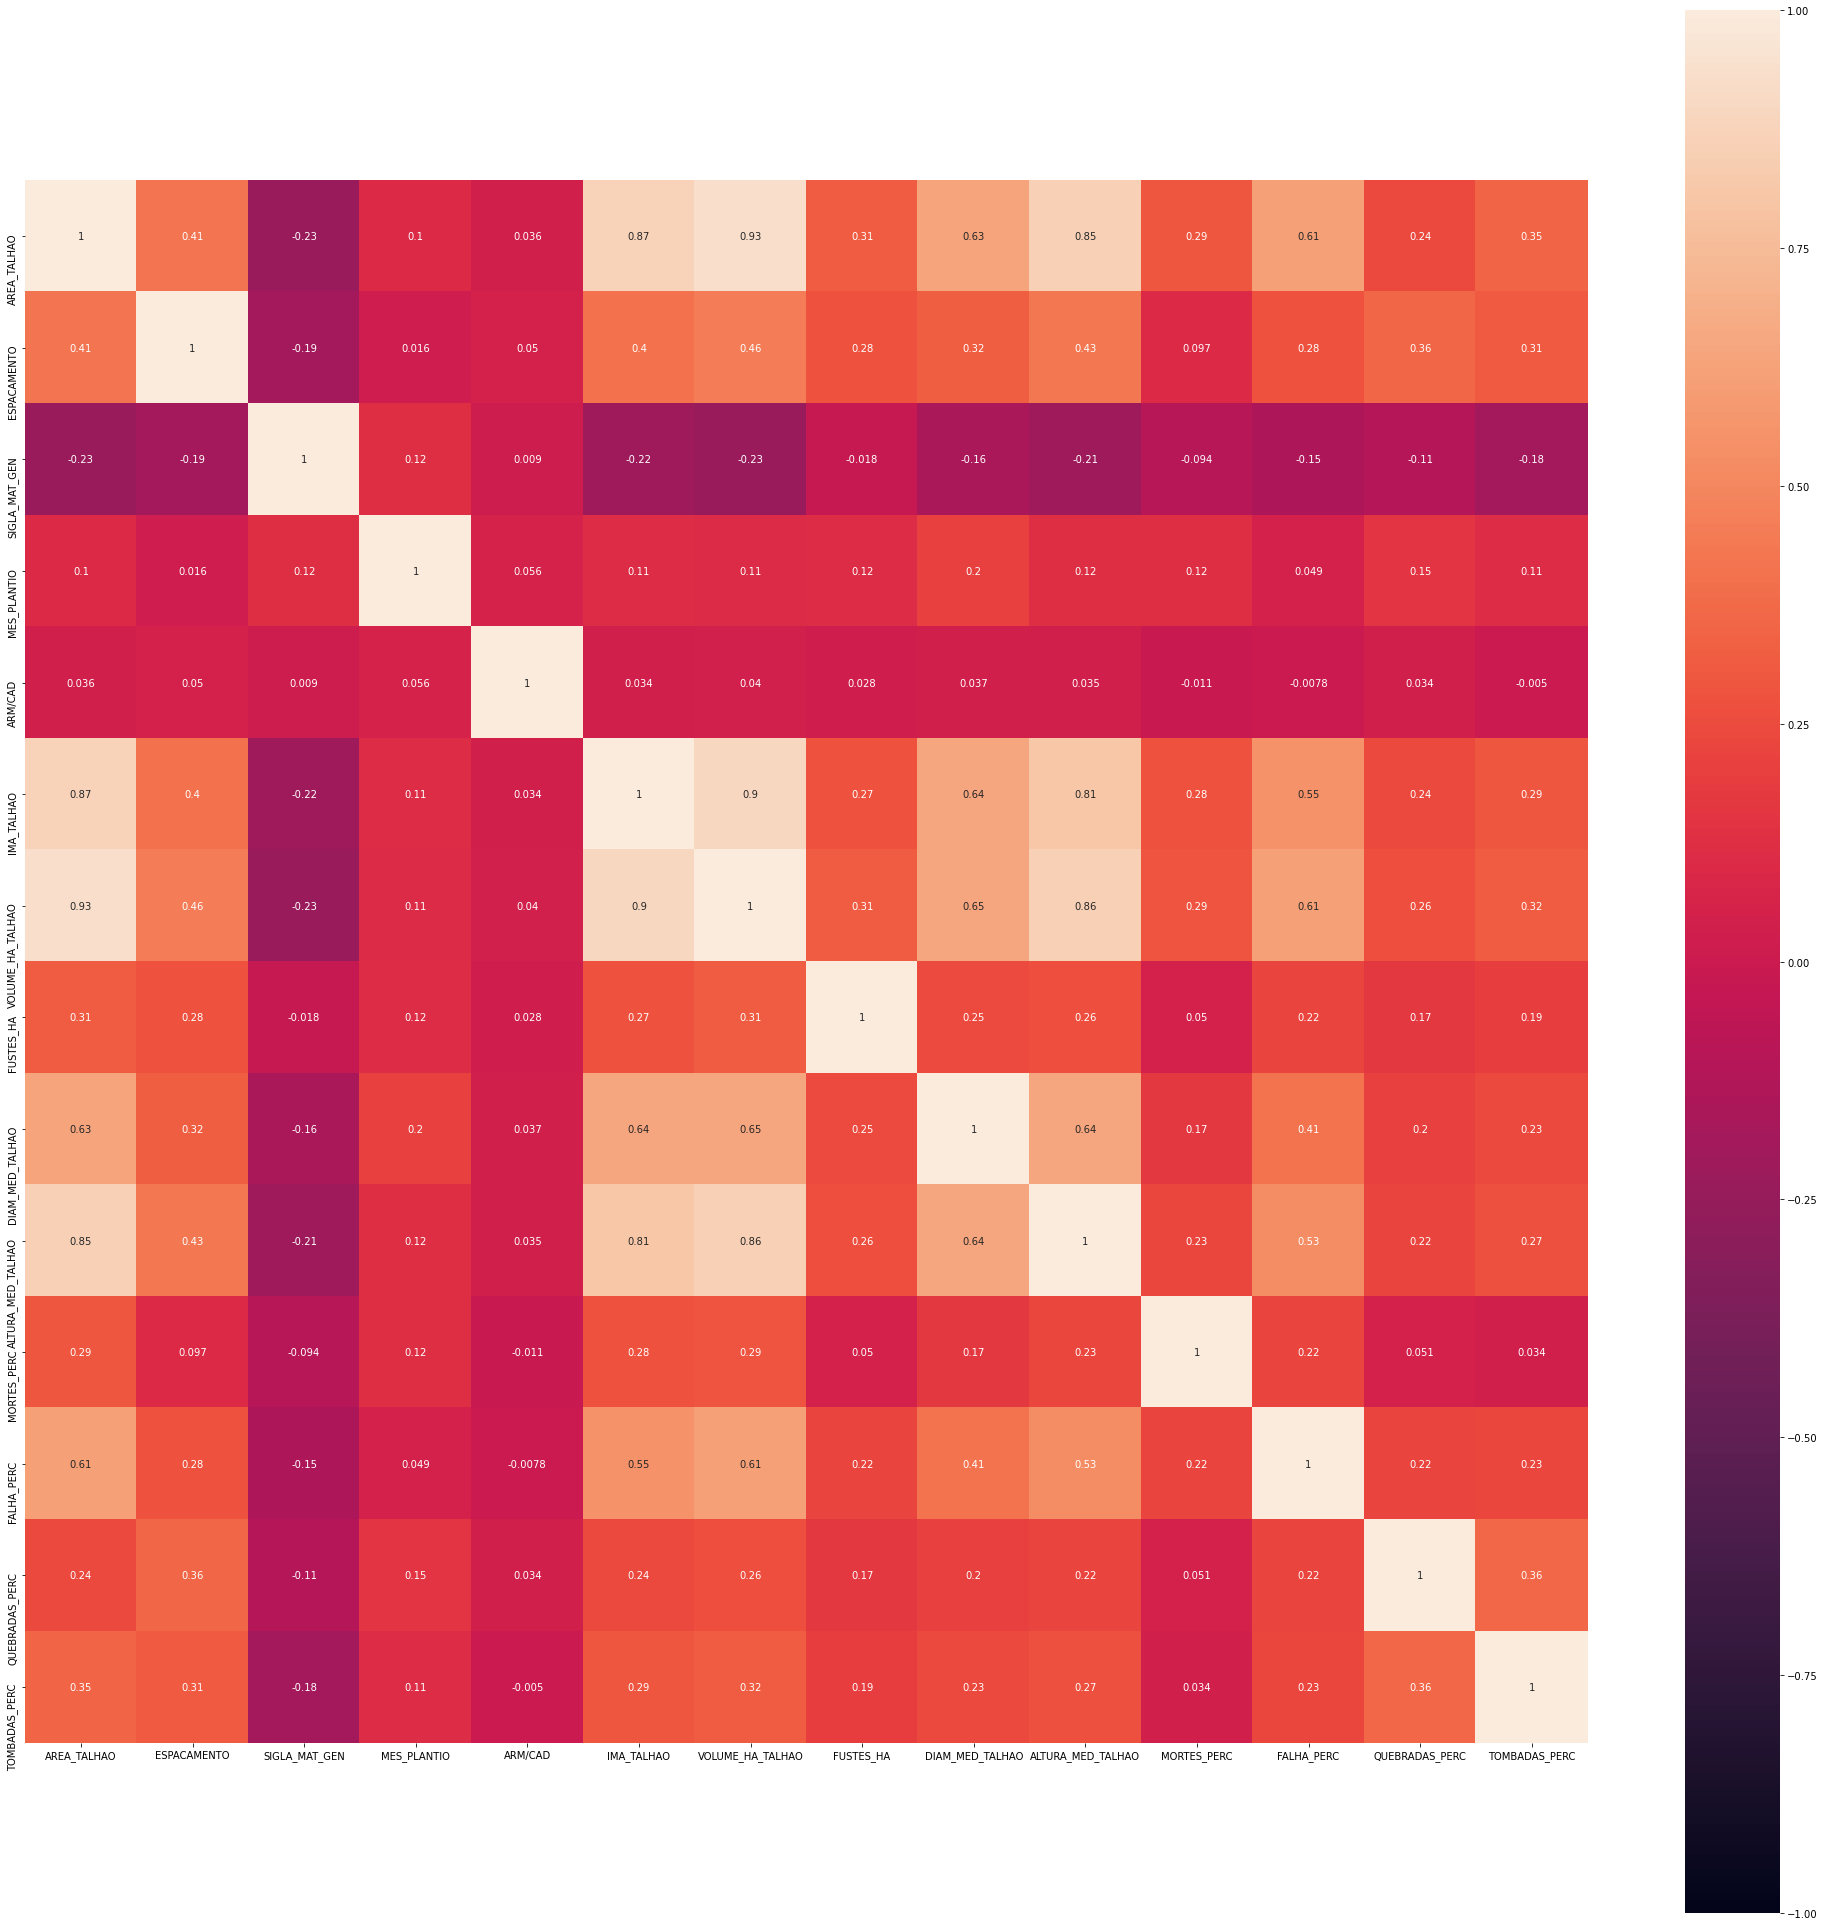

In [302]:
corr= matrizCorrelacao(matriz)

##### Compreendendo a Matriz de Correlação
##### Os valores podem ser  (+) ou (-):
- 0.20 a 0.39 : fraca
- 0.40 a 0.69 : moderada
- 0.70 a 0.89 : forte
- 0.90 a 1 : muito forte
#### Correlação Positiva: as duas variáveis crescem no mesmo sentido, ou seja, quando uma aumenta outra também aumenta  (são diretamente proporcionais).
#### Correlação Negativa: As duas variáveis aumentam em sentido contrário, ou seja, quando uma aumenta a outra diminui (são inversamente proporcionais).
#### Correlação Nula: Não a interação entre variáveis.

In [303]:
corr

,AREA_TALHAO,ESPACAMENTO,SIGLA_MAT_GEN,MES_PLANTIO,ARM/CAD,IMA_TALHAO,VOLUME_HA_TALHAO,FUSTES_HA,DIAM_MED_TALHAO,ALTURA_MED_TALHAO,MORTES_PERC,FALHA_PERC,QUEBRADAS_PERC,TOMBADAS_PERC
AREA_TALHAO,1.000000,0.414152,-0.231747,0.100982,0.035920,0.869256,0.930027,0.313810,0.634325,0.853223,0.290392,0.613336,0.240562,0.349178
ESPACAMENTO,0.414152,1.000000,-0.193487,0.015729,0.049907,0.402318,0.458783,0.276206,0.321936,0.430955,0.097102,0.276046,0.355490,0.308824
SIGLA_MAT_GEN,-0.231747,-0.193487,1.000000,0.118018,0.009012,-0.217174,-0.230955,-0.017506,-0.164005,-0.213817,-0.094064,-0.145326,-0.114712,-0.183024
MES_PLANTIO,0.100982,0.015729,0.118018,1.000000,0.055778,0.113200,0.109156,0.115321,0.201166,0.120549,0.118600,0.048999,0.150011,0.113361
ARM/CAD,0.035920,0.049907,0.009012,0.055778,1.000000,0.034418,0.039863,0.028151,0.036512,0.034833,-0.011175,-0.007754,0.033539,-0.004995
IMA_TALHAO,0.869256,0.402318,-0.217174,0.113200,0.034418,1.000000,0.895826,0.274590,0.643495,0.811045,0.275062,0.551619,0.235313,0.292625
VOLUME_HA_TALHAO,0.930027,0.458783,-0.230955,0.109156,0.039863,0.895826,1.000000,0.313861,0.645580,0.858465,0.286073,0.612576,0.264523,0.316975
FUSTES_HA,0.313810,0.276206,-0.017506,0.115321,0.028151,0.274590,0.313861,1.000000,0.248115,0.260501,0.050071,0.222720,0.167347,0.189447
DIAM_MED_TALHAO,0.634325,0.321936,-0.164005,0.201166,0.036512,0.643495,0.645580,0.248115,1.000000,0.643713,0.168738,0.407148,0.203718,0.234827
ALTURA_MED_TALHAO,0.853223,0.430955,-0.213817,0.120549,0.034833,0.811045,0.858465,0.260501,0.643713,1.000000,0.234268,0.526605,0.219150,0.268396


### Verificando quais dados são o melhor

In [304]:
corr.query("IMA_TALHAO!=1 & IMA_TALHAO> 0.39 | IMA_TALHAO < -0.39")

,AREA_TALHAO,ESPACAMENTO,SIGLA_MAT_GEN,MES_PLANTIO,ARM/CAD,IMA_TALHAO,VOLUME_HA_TALHAO,FUSTES_HA,DIAM_MED_TALHAO,ALTURA_MED_TALHAO,MORTES_PERC,FALHA_PERC,QUEBRADAS_PERC,TOMBADAS_PERC
AREA_TALHAO,1.000000,0.414152,-0.231747,0.100982,0.035920,0.869256,0.930027,0.313810,0.634325,0.853223,0.290392,0.613336,0.240562,0.349178
ESPACAMENTO,0.414152,1.000000,-0.193487,0.015729,0.049907,0.402318,0.458783,0.276206,0.321936,0.430955,0.097102,0.276046,0.355490,0.308824
VOLUME_HA_TALHAO,0.930027,0.458783,-0.230955,0.109156,0.039863,0.895826,1.000000,0.313861,0.645580,0.858465,0.286073,0.612576,0.264523,0.316975
DIAM_MED_TALHAO,0.634325,0.321936,-0.164005,0.201166,0.036512,0.643495,0.645580,0.248115,1.000000,0.643713,0.168738,0.407148,0.203718,0.234827
ALTURA_MED_TALHAO,0.853223,0.430955,-0.213817,0.120549,0.034833,0.811045,0.858465,0.260501,0.643713,1.000000,0.234268,0.526605,0.219150,0.268396
FALHA_PERC,0.613336,0.276046,-0.145326,0.048999,-0.007754,0.551619,0.612576,0.222720,0.407148,0.526605,0.220334,1.000000,0.221945,0.230425


In [305]:
corr.query("VOLUME_HA_TALHAO!=1 & VOLUME_HA_TALHAO> 0.39 | VOLUME_HA_TALHAO < -0.39")

,AREA_TALHAO,ESPACAMENTO,SIGLA_MAT_GEN,MES_PLANTIO,ARM/CAD,IMA_TALHAO,VOLUME_HA_TALHAO,FUSTES_HA,DIAM_MED_TALHAO,ALTURA_MED_TALHAO,MORTES_PERC,FALHA_PERC,QUEBRADAS_PERC,TOMBADAS_PERC
AREA_TALHAO,1.000000,0.414152,-0.231747,0.100982,0.035920,0.869256,0.930027,0.313810,0.634325,0.853223,0.290392,0.613336,0.240562,0.349178
ESPACAMENTO,0.414152,1.000000,-0.193487,0.015729,0.049907,0.402318,0.458783,0.276206,0.321936,0.430955,0.097102,0.276046,0.355490,0.308824
IMA_TALHAO,0.869256,0.402318,-0.217174,0.113200,0.034418,1.000000,0.895826,0.274590,0.643495,0.811045,0.275062,0.551619,0.235313,0.292625
DIAM_MED_TALHAO,0.634325,0.321936,-0.164005,0.201166,0.036512,0.643495,0.645580,0.248115,1.000000,0.643713,0.168738,0.407148,0.203718,0.234827
ALTURA_MED_TALHAO,0.853223,0.430955,-0.213817,0.120549,0.034833,0.811045,0.858465,0.260501,0.643713,1.000000,0.234268,0.526605,0.219150,0.268396
FALHA_PERC,0.613336,0.276046,-0.145326,0.048999,-0.007754,0.551619,0.612576,0.222720,0.407148,0.526605,0.220334,1.000000,0.221945,0.230425


In [306]:
corr.query("FUSTES_HA!=1 & FUSTES_HA> 0.39 | FUSTES_HA < -0.39")

,AREA_TALHAO,ESPACAMENTO,SIGLA_MAT_GEN,MES_PLANTIO,ARM/CAD,IMA_TALHAO,VOLUME_HA_TALHAO,FUSTES_HA,DIAM_MED_TALHAO,ALTURA_MED_TALHAO,MORTES_PERC,FALHA_PERC,QUEBRADAS_PERC,TOMBADAS_PERC


In [307]:
corr.query("DIAM_MED_TALHAO!=1 & DIAM_MED_TALHAO> 0.39 | DIAM_MED_TALHAO < -0.39")

,AREA_TALHAO,ESPACAMENTO,SIGLA_MAT_GEN,MES_PLANTIO,ARM/CAD,IMA_TALHAO,VOLUME_HA_TALHAO,FUSTES_HA,DIAM_MED_TALHAO,ALTURA_MED_TALHAO,MORTES_PERC,FALHA_PERC,QUEBRADAS_PERC,TOMBADAS_PERC
AREA_TALHAO,1.000000,0.414152,-0.231747,0.100982,0.035920,0.869256,0.930027,0.313810,0.634325,0.853223,0.290392,0.613336,0.240562,0.349178
IMA_TALHAO,0.869256,0.402318,-0.217174,0.113200,0.034418,1.000000,0.895826,0.274590,0.643495,0.811045,0.275062,0.551619,0.235313,0.292625
VOLUME_HA_TALHAO,0.930027,0.458783,-0.230955,0.109156,0.039863,0.895826,1.000000,0.313861,0.645580,0.858465,0.286073,0.612576,0.264523,0.316975
ALTURA_MED_TALHAO,0.853223,0.430955,-0.213817,0.120549,0.034833,0.811045,0.858465,0.260501,0.643713,1.000000,0.234268,0.526605,0.219150,0.268396
FALHA_PERC,0.613336,0.276046,-0.145326,0.048999,-0.007754,0.551619,0.612576,0.222720,0.407148,0.526605,0.220334,1.000000,0.221945,0.230425


In [308]:
corr.query("ALTURA_MED_TALHAO!=1 & ALTURA_MED_TALHAO> 0.39 | ALTURA_MED_TALHAO < -0.39")

,AREA_TALHAO,ESPACAMENTO,SIGLA_MAT_GEN,MES_PLANTIO,ARM/CAD,IMA_TALHAO,VOLUME_HA_TALHAO,FUSTES_HA,DIAM_MED_TALHAO,ALTURA_MED_TALHAO,MORTES_PERC,FALHA_PERC,QUEBRADAS_PERC,TOMBADAS_PERC
AREA_TALHAO,1.000000,0.414152,-0.231747,0.100982,0.035920,0.869256,0.930027,0.313810,0.634325,0.853223,0.290392,0.613336,0.240562,0.349178
ESPACAMENTO,0.414152,1.000000,-0.193487,0.015729,0.049907,0.402318,0.458783,0.276206,0.321936,0.430955,0.097102,0.276046,0.355490,0.308824
IMA_TALHAO,0.869256,0.402318,-0.217174,0.113200,0.034418,1.000000,0.895826,0.274590,0.643495,0.811045,0.275062,0.551619,0.235313,0.292625
VOLUME_HA_TALHAO,0.930027,0.458783,-0.230955,0.109156,0.039863,0.895826,1.000000,0.313861,0.645580,0.858465,0.286073,0.612576,0.264523,0.316975
DIAM_MED_TALHAO,0.634325,0.321936,-0.164005,0.201166,0.036512,0.643495,0.645580,0.248115,1.000000,0.643713,0.168738,0.407148,0.203718,0.234827
FALHA_PERC,0.613336,0.276046,-0.145326,0.048999,-0.007754,0.551619,0.612576,0.222720,0.407148,0.526605,0.220334,1.000000,0.221945,0.230425


In [309]:
corr.query("MORTES_PERC!=1 & MORTES_PERC> 0.39 | MORTES_PERC < -0.39")

,AREA_TALHAO,ESPACAMENTO,SIGLA_MAT_GEN,MES_PLANTIO,ARM/CAD,IMA_TALHAO,VOLUME_HA_TALHAO,FUSTES_HA,DIAM_MED_TALHAO,ALTURA_MED_TALHAO,MORTES_PERC,FALHA_PERC,QUEBRADAS_PERC,TOMBADAS_PERC


In [310]:
corr.query("FALHA_PERC!=1 & FALHA_PERC> 0.39 | FALHA_PERC < -0.39")

,AREA_TALHAO,ESPACAMENTO,SIGLA_MAT_GEN,MES_PLANTIO,ARM/CAD,IMA_TALHAO,VOLUME_HA_TALHAO,FUSTES_HA,DIAM_MED_TALHAO,ALTURA_MED_TALHAO,MORTES_PERC,FALHA_PERC,QUEBRADAS_PERC,TOMBADAS_PERC
AREA_TALHAO,1.000000,0.414152,-0.231747,0.100982,0.035920,0.869256,0.930027,0.313810,0.634325,0.853223,0.290392,0.613336,0.240562,0.349178
IMA_TALHAO,0.869256,0.402318,-0.217174,0.113200,0.034418,1.000000,0.895826,0.274590,0.643495,0.811045,0.275062,0.551619,0.235313,0.292625
VOLUME_HA_TALHAO,0.930027,0.458783,-0.230955,0.109156,0.039863,0.895826,1.000000,0.313861,0.645580,0.858465,0.286073,0.612576,0.264523,0.316975
DIAM_MED_TALHAO,0.634325,0.321936,-0.164005,0.201166,0.036512,0.643495,0.645580,0.248115,1.000000,0.643713,0.168738,0.407148,0.203718,0.234827
ALTURA_MED_TALHAO,0.853223,0.430955,-0.213817,0.120549,0.034833,0.811045,0.858465,0.260501,0.643713,1.000000,0.234268,0.526605,0.219150,0.268396


In [311]:
corr.query("QUEBRADAS_PERC!=1 & QUEBRADAS_PERC> 0.39 | QUEBRADAS_PERC < -0.39")

,AREA_TALHAO,ESPACAMENTO,SIGLA_MAT_GEN,MES_PLANTIO,ARM/CAD,IMA_TALHAO,VOLUME_HA_TALHAO,FUSTES_HA,DIAM_MED_TALHAO,ALTURA_MED_TALHAO,MORTES_PERC,FALHA_PERC,QUEBRADAS_PERC,TOMBADAS_PERC


In [312]:
corr.query("TOMBADAS_PERC!=1 & TOMBADAS_PERC> 0.39 | TOMBADAS_PERC < -0.39")

,AREA_TALHAO,ESPACAMENTO,SIGLA_MAT_GEN,MES_PLANTIO,ARM/CAD,IMA_TALHAO,VOLUME_HA_TALHAO,FUSTES_HA,DIAM_MED_TALHAO,ALTURA_MED_TALHAO,MORTES_PERC,FALHA_PERC,QUEBRADAS_PERC,TOMBADAS_PERC


In [313]:
corr.query("ESPACAMENTO!=1 & ESPACAMENTO> 0.39 | ESPACAMENTO < -0.39")

,AREA_TALHAO,ESPACAMENTO,SIGLA_MAT_GEN,MES_PLANTIO,ARM/CAD,IMA_TALHAO,VOLUME_HA_TALHAO,FUSTES_HA,DIAM_MED_TALHAO,ALTURA_MED_TALHAO,MORTES_PERC,FALHA_PERC,QUEBRADAS_PERC,TOMBADAS_PERC
AREA_TALHAO,1.000000,0.414152,-0.231747,0.100982,0.035920,0.869256,0.930027,0.313810,0.634325,0.853223,0.290392,0.613336,0.240562,0.349178
IMA_TALHAO,0.869256,0.402318,-0.217174,0.113200,0.034418,1.000000,0.895826,0.274590,0.643495,0.811045,0.275062,0.551619,0.235313,0.292625
VOLUME_HA_TALHAO,0.930027,0.458783,-0.230955,0.109156,0.039863,0.895826,1.000000,0.313861,0.645580,0.858465,0.286073,0.612576,0.264523,0.316975
ALTURA_MED_TALHAO,0.853223,0.430955,-0.213817,0.120549,0.034833,0.811045,0.858465,0.260501,0.643713,1.000000,0.234268,0.526605,0.219150,0.268396


## Matriz de correlação - ênfase nas atividades

In [314]:
colunas = [
                         "MES_PLANTIO",
                         "DESC_GRP_ATIVIDADE",
                         "NOME_ATIVIDADE",
                         "% AREA",
                         "MES_ATIVIDADE_REALIZ",
                         "IDADE_TALHAO_ATIVIDADE",
                         "IDADE_TALHAO_INVENTARIO",
                         "CHOVEU",
                         "QUANTO",
                         "C_DIA_ANT",
                         "C_DIA_POST",
                         "C_3_DIAS_A",
                         "C_3_DIAS_D",
                         "IMA_TALHAO",
                         "VOLUME_HA_TALHAO",
                         "FUSTES_HA",
                         "DIAM_MED_TALHAO",
                         "ALTURA_MED_TALHAO",
                         "MORTES_PERC",
                         "FALHA_PERC",
                         "QUEBRADAS_PERC",
                         "TOMBADAS_PERC"]
matriz = criarBaseDados(df,colunas)

<ipython-input-284-01b3dcc2666b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[col],_ = converterDadosMatriz(n, col)


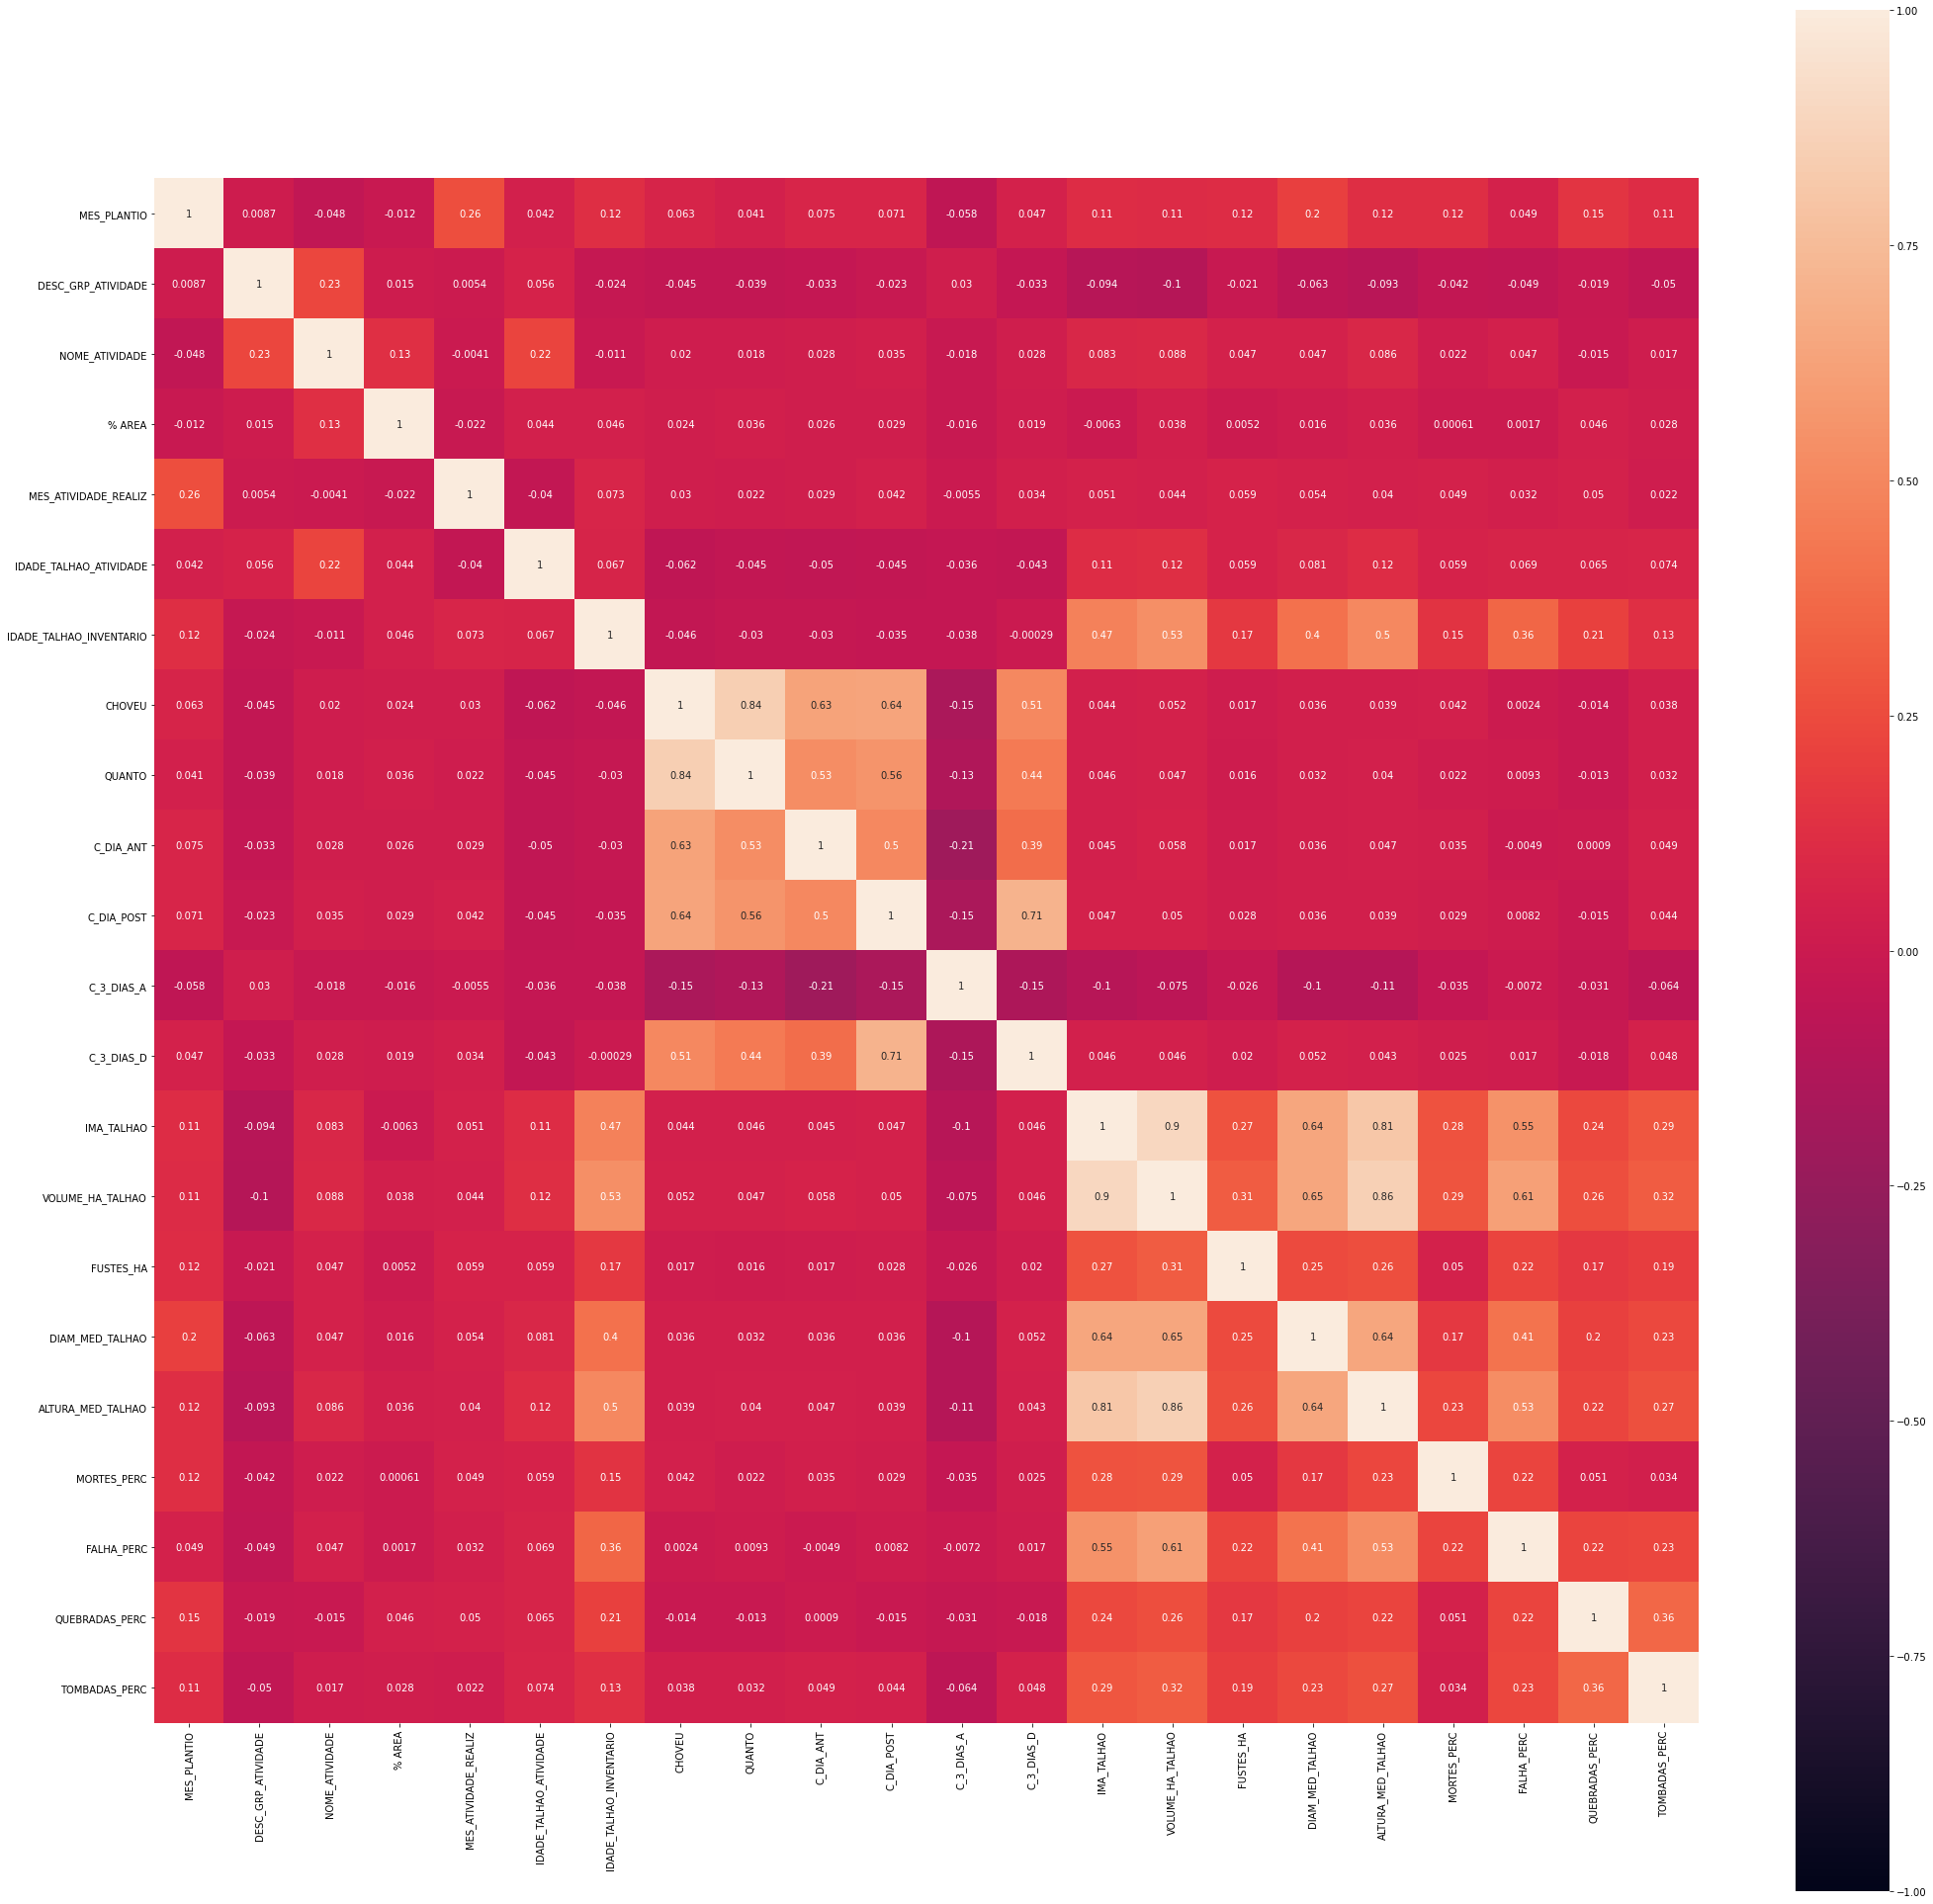

In [315]:
corr= matrizCorrelacao(matriz)

In [316]:
corr

,MES_PLANTIO,DESC_GRP_ATIVIDADE,NOME_ATIVIDADE,% AREA,MES_ATIVIDADE_REALIZ,IDADE_TALHAO_ATIVIDADE,IDADE_TALHAO_INVENTARIO,CHOVEU,QUANTO,C_DIA_ANT,...,C_3_DIAS_D,IMA_TALHAO,VOLUME_HA_TALHAO,FUSTES_HA,DIAM_MED_TALHAO,ALTURA_MED_TALHAO,MORTES_PERC,FALHA_PERC,QUEBRADAS_PERC,TOMBADAS_PERC
MES_PLANTIO,1.000000,0.008717,-0.047774,-0.012466,0.258602,0.041798,0.118331,0.063036,0.041051,0.074765,...,0.047300,0.113200,0.109156,0.115321,0.201166,0.120549,0.118600,0.048999,0.150011,0.113361
DESC_GRP_ATIVIDADE,0.008717,1.000000,0.233163,0.014782,0.005365,0.056143,-0.024252,-0.045475,-0.039222,-0.032535,...,-0.033018,-0.093990,-0.101796,-0.021466,-0.063097,-0.092810,-0.042144,-0.049325,-0.018532,-0.049738
NOME_ATIVIDADE,-0.047774,0.233163,1.000000,0.130371,-0.004119,0.219964,-0.011291,0.019881,0.018215,0.028301,...,0.028338,0.083139,0.088378,0.047018,0.047488,0.085603,0.021799,0.046634,-0.014599,0.016997
% AREA,-0.012466,0.014782,0.130371,1.000000,-0.021897,0.043607,0.045930,0.024176,0.035623,0.025638,...,0.019443,-0.006316,0.037663,0.005186,0.015845,0.036004,0.000612,0.001749,0.045757,0.028038
MES_ATIVIDADE_REALIZ,0.258602,0.005365,-0.004119,-0.021897,1.000000,-0.040028,0.073029,0.029900,0.021739,0.029356,...,0.033526,0.051373,0.044450,0.059106,0.054465,0.039762,0.048559,0.031825,0.049824,0.022389
IDADE_TALHAO_ATIVIDADE,0.041798,0.056143,0.219964,0.043607,-0.040028,1.000000,0.066947,-0.061999,-0.045414,-0.049683,...,-0.043093,0.110181,0.118728,0.058506,0.081059,0.116624,0.058793,0.069260,0.065203,0.074125
IDADE_TALHAO_INVENTARIO,0.118331,-0.024252,-0.011291,0.045930,0.073029,0.066947,1.000000,-0.045957,-0.029690,-0.029675,...,-0.000287,0.474083,0.534763,0.170994,0.403425,0.502576,0.146728,0.359141,0.210141,0.125530
CHOVEU,0.063036,-0.045475,0.019881,0.024176,0.029900,-0.061999,-0.045957,1.000000,0.844228,0.625254,...,0.506927,0.043963,0.052424,0.016730,0.035561,0.038788,0.042364,0.002422,-0.013679,0.038031
QUANTO,0.041051,-0.039222,0.018215,0.035623,0.021739,-0.045414,-0.029690,0.844228,1.000000,0.530280,...,0.438162,0.046096,0.047024,0.015609,0.031840,0.040349,0.022115,0.009308,-0.012791,0.032058
C_DIA_ANT,0.074765,-0.032535,0.028301,0.025638,0.029356,-0.049683,-0.029675,0.625254,0.530280,1.000000,...,0.386188,0.045292,0.058106,0.016875,0.035927,0.046562,0.034866,-0.004871,0.000900,0.049211


In [317]:
corr.query("CHOVEU!=1 & CHOVEU > 0.39 | CHOVEU < -0.39")

,MES_PLANTIO,DESC_GRP_ATIVIDADE,NOME_ATIVIDADE,% AREA,MES_ATIVIDADE_REALIZ,IDADE_TALHAO_ATIVIDADE,IDADE_TALHAO_INVENTARIO,CHOVEU,QUANTO,C_DIA_ANT,...,C_3_DIAS_D,IMA_TALHAO,VOLUME_HA_TALHAO,FUSTES_HA,DIAM_MED_TALHAO,ALTURA_MED_TALHAO,MORTES_PERC,FALHA_PERC,QUEBRADAS_PERC,TOMBADAS_PERC
QUANTO,0.041051,-0.039222,0.018215,0.035623,0.021739,-0.045414,-0.029690,0.844228,1.000000,0.530280,...,0.438162,0.046096,0.047024,0.015609,0.031840,0.040349,0.022115,0.009308,-0.012791,0.032058
C_DIA_ANT,0.074765,-0.032535,0.028301,0.025638,0.029356,-0.049683,-0.029675,0.625254,0.530280,1.000000,...,0.386188,0.045292,0.058106,0.016875,0.035927,0.046562,0.034866,-0.004871,0.000900,0.049211
C_DIA_POST,0.071461,-0.022796,0.035284,0.029021,0.041738,-0.045033,-0.034617,0.635254,0.557460,0.501510,...,0.706383,0.046959,0.049605,0.027851,0.036023,0.038624,0.029438,0.008249,-0.014829,0.043661
C_3_DIAS_D,0.047300,-0.033018,0.028338,0.019443,0.033526,-0.043093,-0.000287,0.506927,0.438162,0.386188,...,1.000000,0.045949,0.046464,0.019917,0.052486,0.043307,0.025370,0.016698,-0.017973,0.048443


In [318]:
corr.query("QUANTO!=1 & QUANTO > 0.39 | QUANTO < -0.39")

,MES_PLANTIO,DESC_GRP_ATIVIDADE,NOME_ATIVIDADE,% AREA,MES_ATIVIDADE_REALIZ,IDADE_TALHAO_ATIVIDADE,IDADE_TALHAO_INVENTARIO,CHOVEU,QUANTO,C_DIA_ANT,...,C_3_DIAS_D,IMA_TALHAO,VOLUME_HA_TALHAO,FUSTES_HA,DIAM_MED_TALHAO,ALTURA_MED_TALHAO,MORTES_PERC,FALHA_PERC,QUEBRADAS_PERC,TOMBADAS_PERC
CHOVEU,0.063036,-0.045475,0.019881,0.024176,0.029900,-0.061999,-0.045957,1.000000,0.844228,0.625254,...,0.506927,0.043963,0.052424,0.016730,0.035561,0.038788,0.042364,0.002422,-0.013679,0.038031
C_DIA_ANT,0.074765,-0.032535,0.028301,0.025638,0.029356,-0.049683,-0.029675,0.625254,0.530280,1.000000,...,0.386188,0.045292,0.058106,0.016875,0.035927,0.046562,0.034866,-0.004871,0.000900,0.049211
C_DIA_POST,0.071461,-0.022796,0.035284,0.029021,0.041738,-0.045033,-0.034617,0.635254,0.557460,0.501510,...,0.706383,0.046959,0.049605,0.027851,0.036023,0.038624,0.029438,0.008249,-0.014829,0.043661
C_3_DIAS_D,0.047300,-0.033018,0.028338,0.019443,0.033526,-0.043093,-0.000287,0.506927,0.438162,0.386188,...,1.000000,0.045949,0.046464,0.019917,0.052486,0.043307,0.025370,0.016698,-0.017973,0.048443


In [319]:
corr.query("C_DIA_ANT !=1 & C_DIA_ANT > 0.39 | C_DIA_ANT < -0.39")

,MES_PLANTIO,DESC_GRP_ATIVIDADE,NOME_ATIVIDADE,% AREA,MES_ATIVIDADE_REALIZ,IDADE_TALHAO_ATIVIDADE,IDADE_TALHAO_INVENTARIO,CHOVEU,QUANTO,C_DIA_ANT,...,C_3_DIAS_D,IMA_TALHAO,VOLUME_HA_TALHAO,FUSTES_HA,DIAM_MED_TALHAO,ALTURA_MED_TALHAO,MORTES_PERC,FALHA_PERC,QUEBRADAS_PERC,TOMBADAS_PERC
CHOVEU,0.063036,-0.045475,0.019881,0.024176,0.029900,-0.061999,-0.045957,1.000000,0.844228,0.625254,...,0.506927,0.043963,0.052424,0.016730,0.035561,0.038788,0.042364,0.002422,-0.013679,0.038031
QUANTO,0.041051,-0.039222,0.018215,0.035623,0.021739,-0.045414,-0.029690,0.844228,1.000000,0.530280,...,0.438162,0.046096,0.047024,0.015609,0.031840,0.040349,0.022115,0.009308,-0.012791,0.032058
C_DIA_POST,0.071461,-0.022796,0.035284,0.029021,0.041738,-0.045033,-0.034617,0.635254,0.557460,0.501510,...,0.706383,0.046959,0.049605,0.027851,0.036023,0.038624,0.029438,0.008249,-0.014829,0.043661


In [320]:
corr.query("C_DIA_POST !=1 & C_DIA_POST > 0.39 | C_DIA_POST < -0.39")

,MES_PLANTIO,DESC_GRP_ATIVIDADE,NOME_ATIVIDADE,% AREA,MES_ATIVIDADE_REALIZ,IDADE_TALHAO_ATIVIDADE,IDADE_TALHAO_INVENTARIO,CHOVEU,QUANTO,C_DIA_ANT,...,C_3_DIAS_D,IMA_TALHAO,VOLUME_HA_TALHAO,FUSTES_HA,DIAM_MED_TALHAO,ALTURA_MED_TALHAO,MORTES_PERC,FALHA_PERC,QUEBRADAS_PERC,TOMBADAS_PERC
CHOVEU,0.063036,-0.045475,0.019881,0.024176,0.029900,-0.061999,-0.045957,1.000000,0.844228,0.625254,...,0.506927,0.043963,0.052424,0.016730,0.035561,0.038788,0.042364,0.002422,-0.013679,0.038031
QUANTO,0.041051,-0.039222,0.018215,0.035623,0.021739,-0.045414,-0.029690,0.844228,1.000000,0.530280,...,0.438162,0.046096,0.047024,0.015609,0.031840,0.040349,0.022115,0.009308,-0.012791,0.032058
C_DIA_ANT,0.074765,-0.032535,0.028301,0.025638,0.029356,-0.049683,-0.029675,0.625254,0.530280,1.000000,...,0.386188,0.045292,0.058106,0.016875,0.035927,0.046562,0.034866,-0.004871,0.000900,0.049211
C_3_DIAS_D,0.047300,-0.033018,0.028338,0.019443,0.033526,-0.043093,-0.000287,0.506927,0.438162,0.386188,...,1.000000,0.045949,0.046464,0.019917,0.052486,0.043307,0.025370,0.016698,-0.017973,0.048443


In [321]:
corr.query("C_3_DIAS_A !=1 & C_3_DIAS_A > 0.39 | C_3_DIAS_A < -0.39")

,MES_PLANTIO,DESC_GRP_ATIVIDADE,NOME_ATIVIDADE,% AREA,MES_ATIVIDADE_REALIZ,IDADE_TALHAO_ATIVIDADE,IDADE_TALHAO_INVENTARIO,CHOVEU,QUANTO,C_DIA_ANT,...,C_3_DIAS_D,IMA_TALHAO,VOLUME_HA_TALHAO,FUSTES_HA,DIAM_MED_TALHAO,ALTURA_MED_TALHAO,MORTES_PERC,FALHA_PERC,QUEBRADAS_PERC,TOMBADAS_PERC


In [322]:
corr.query("C_3_DIAS_D !=1 & C_3_DIAS_D > 0.39 | C_3_DIAS_D < -0.39")

,MES_PLANTIO,DESC_GRP_ATIVIDADE,NOME_ATIVIDADE,% AREA,MES_ATIVIDADE_REALIZ,IDADE_TALHAO_ATIVIDADE,IDADE_TALHAO_INVENTARIO,CHOVEU,QUANTO,C_DIA_ANT,...,C_3_DIAS_D,IMA_TALHAO,VOLUME_HA_TALHAO,FUSTES_HA,DIAM_MED_TALHAO,ALTURA_MED_TALHAO,MORTES_PERC,FALHA_PERC,QUEBRADAS_PERC,TOMBADAS_PERC
CHOVEU,0.063036,-0.045475,0.019881,0.024176,0.029900,-0.061999,-0.045957,1.000000,0.844228,0.625254,...,0.506927,0.043963,0.052424,0.016730,0.035561,0.038788,0.042364,0.002422,-0.013679,0.038031
QUANTO,0.041051,-0.039222,0.018215,0.035623,0.021739,-0.045414,-0.029690,0.844228,1.000000,0.530280,...,0.438162,0.046096,0.047024,0.015609,0.031840,0.040349,0.022115,0.009308,-0.012791,0.032058
C_DIA_POST,0.071461,-0.022796,0.035284,0.029021,0.041738,-0.045033,-0.034617,0.635254,0.557460,0.501510,...,0.706383,0.046959,0.049605,0.027851,0.036023,0.038624,0.029438,0.008249,-0.014829,0.043661


In [323]:
def matrizCorrelacao(df):
    n=df
    for col in df.keys():
        n[col],_ = converterDadosMatriz(n, col)
    corrmat = n.corr()
    fig = plt.figure(figsize = (15,15))
    sns.heatmap(corrmat,
                vmax = 1,
                square = True,
                annot = True,
                vmin = -1
               )
    plt.show()
    return corrmat

## Matriz de correlação com ênfase em espaçamento

In [324]:
colunas =["AREA_TALHAO",
                         "ESPACAMENTO",
                         "IMA_TALHAO",
                         "VOLUME_HA_TALHAO",
                         "FUSTES_HA",
                         "DIAM_MED_TALHAO",
                         "ALTURA_MED_TALHAO",
                         ]
matriz = criarBaseDados(df,colunas)

<ipython-input-323-3b2553fa2027>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[col],_ = converterDadosMatriz(n, col)


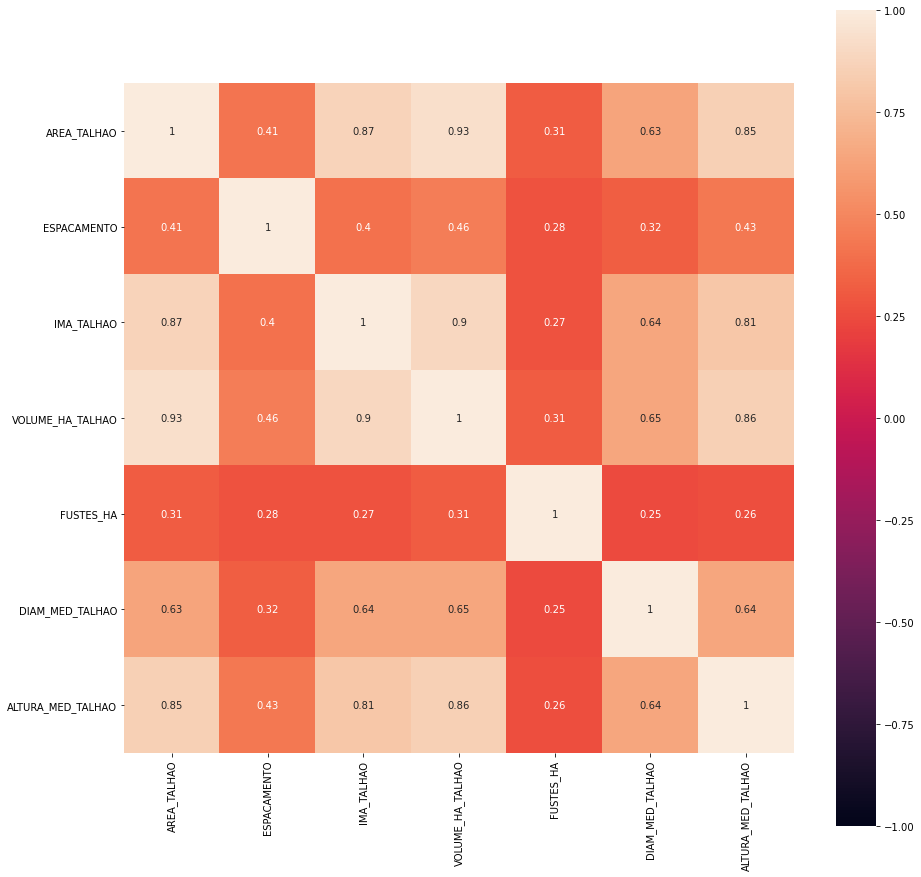

In [325]:
corr= matrizCorrelacao(matriz)

In [326]:
corr

,AREA_TALHAO,ESPACAMENTO,IMA_TALHAO,VOLUME_HA_TALHAO,FUSTES_HA,DIAM_MED_TALHAO,ALTURA_MED_TALHAO
AREA_TALHAO,1.000000,0.414152,0.869256,0.930027,0.313810,0.634325,0.853223
ESPACAMENTO,0.414152,1.000000,0.402318,0.458783,0.276206,0.321936,0.430955
IMA_TALHAO,0.869256,0.402318,1.000000,0.895826,0.274590,0.643495,0.811045
VOLUME_HA_TALHAO,0.930027,0.458783,0.895826,1.000000,0.313861,0.645580,0.858465
FUSTES_HA,0.313810,0.276206,0.274590,0.313861,1.000000,0.248115,0.260501
DIAM_MED_TALHAO,0.634325,0.321936,0.643495,0.645580,0.248115,1.000000,0.643713
ALTURA_MED_TALHAO,0.853223,0.430955,0.811045,0.858465,0.260501,0.643713,1.000000


In [327]:
corr.query("ESPACAMENTO!=1 & ESPACAMENTO> 0.39 | ESPACAMENTO < -0.39")

,AREA_TALHAO,ESPACAMENTO,IMA_TALHAO,VOLUME_HA_TALHAO,FUSTES_HA,DIAM_MED_TALHAO,ALTURA_MED_TALHAO
AREA_TALHAO,1.000000,0.414152,0.869256,0.930027,0.313810,0.634325,0.853223
IMA_TALHAO,0.869256,0.402318,1.000000,0.895826,0.274590,0.643495,0.811045
VOLUME_HA_TALHAO,0.930027,0.458783,0.895826,1.000000,0.313861,0.645580,0.858465
ALTURA_MED_TALHAO,0.853223,0.430955,0.811045,0.858465,0.260501,0.643713,1.000000


In [357]:
df1

,IMA_TALHAO,VOLUME_HA_TALHAO,ALTURA_MED_TALHAO,ESPACAMENTO
0,50,"230,02","22,23","3,45 X 2,35"
1,50,"230,02","22,23","3,45 X 2,35"
2,50,"230,02","22,23","3,45 X 2,35"
3,50,"230,02","22,23","3,45 X 2,35"
4,50,"230,02","22,23","3,45 X 2,35"
...,...,...,...,...
8216,"48,51","232,84","22,96","3,45 X 2,35"
8217,"48,51","232,84","22,96","3,45 X 2,35"
8218,"48,51","232,84","22,96","3,45 X 2,35"
8219,"48,51","232,84","22,96","3,45 X 2,35"


### Árvore de decisão

In [422]:
df1=df.query("CODFAZENDA=='7'")
def converterDadosB(df1, coluna):
    df1[coluna]=df1[coluna].apply(lambda x: str(x).replace(",","."))
    df1[coluna]= df1[coluna].astype("float64")
colunas1 = ["IMA_TALHAO","VOLUME_HA_TALHAO","ALTURA_MED_TALHAO","ESPACAMENTO"]
df1

,CODFAZENDA,SIGLA_PROJETO,CODTALHAO,AREA_TALHAO,ESPACAMENTO,SIGLA_MAT_GEN,MES_PLANTIO,DESC_GRP_ATIVIDADE,NOME_ATIVIDADE,% AREA,...,FALHA_PERC,QUEBRADAS_PERC,TOMBADAS_PERC,CHOVEU,QUANTO,C_DIA_ANT,C_DIA_POST,C_3_DIAS_A,C_3_DIAS_D,ARM/CAD
3494,7,IRM 4 2015,230,"22,28","3,45 X 2,35",AEC0144,6,Irrigacao,1ª Irrigacao Plantio,"1,04",...,0,0,0,S,1,N,N,S,S,5
3495,7,IRM 4 2015,230,"22,28","3,45 X 2,35",AEC0144,6,Irrigacao,1ª Irrigacao Replantio,1,...,0,0,0,S,2,N,S,S,S,4
3496,7,IRM 4 2015,230,"22,28","3,45 X 2,35",AEC0144,6,Irrigacao,2ª Irrigacao Plantio,"1,04",...,0,0,0,S,1,N,N,S,S,4
3497,7,IRM 4 2015,230,"22,28","3,45 X 2,35",AEC0144,6,Irrigacao,2ª Irrigacao Replantio,1,...,0,0,0,S,2,S,S,S,S,1
3498,7,IRM 4 2015,230,"22,28","3,45 X 2,35",AEC0144,6,Fertilizacao,Adubacao Aerea,1,...,0,0,0,S,2,S,S,S,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4296,7,IRM 4 2015,281,"3,14","3,45 X 2,35",IPB13,7,Capina Quimica,Capina Quimica Mecanica na Entrelinha Conceica...,1,...,"2,04",0,0,S,1,N,S,S,S,5
4297,7,IRM 4 2015,281,"3,14","3,45 X 2,35",IPB13,7,Controle de Pragas,Combate a Formiga Manual Manutencao - 1 entrada,1,...,"2,04",0,0,N,0,N,N,S,N,3
4298,7,IRM 4 2015,281,"3,14","3,45 X 2,35",IPB13,7,Controle de Pragas,Combate a Formiga Manual Manutencao - 2 entrada,1,...,"2,04",0,0,N,0,N,N,S,N,2
4299,7,IRM 4 2015,281,"3,14","3,45 X 2,35",IPB13,7,Plantio,Plantio Eucalipto sem Gel,1,...,"2,04",0,0,N,0,S,N,S,S,4


In [423]:
esp = converterDados("ESPACAMENTO", df1)

target: 3,45 X 2,35 = 0
target: 3,45 x 3,20 = 1


<ipython-input-287-d8fa3feafe2d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[nome],_=pd.factorize(df1[nome])


In [424]:
converterDadosB(df1, "VOLUME_HA_TALHAO")
converterDadosB(df1, "IMA_TALHAO")
converterDadosB(df1, "ALTURA_MED_TALHAO")


<ipython-input-422-321e4b1bca69>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[coluna]=df1[coluna].apply(lambda x: str(x).replace(",","."))
<ipython-input-422-321e4b1bca69>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[coluna]= df1[coluna].astype("float64")


In [425]:
dados = criarTesteTreinamento("ESPACAMENTO", df1)

In [418]:
df1

,CODFAZENDA,SIGLA_PROJETO,CODTALHAO,AREA_TALHAO,ESPACAMENTO,SIGLA_MAT_GEN,MES_PLANTIO,DESC_GRP_ATIVIDADE,NOME_ATIVIDADE,% AREA,...,FALHA_PERC,QUEBRADAS_PERC,TOMBADAS_PERC,CHOVEU,QUANTO,C_DIA_ANT,C_DIA_POST,C_3_DIAS_A,C_3_DIAS_D,ARM/CAD
3494,7,IRM 4 2015,230,"22,28",0,AEC0144,6,Irrigacao,1ª Irrigacao Plantio,"1,04",...,0,0,0,S,1,N,N,S,S,5
3495,7,IRM 4 2015,230,"22,28",0,AEC0144,6,Irrigacao,1ª Irrigacao Replantio,1,...,0,0,0,S,2,N,S,S,S,4
3496,7,IRM 4 2015,230,"22,28",0,AEC0144,6,Irrigacao,2ª Irrigacao Plantio,"1,04",...,0,0,0,S,1,N,N,S,S,4
3497,7,IRM 4 2015,230,"22,28",0,AEC0144,6,Irrigacao,2ª Irrigacao Replantio,1,...,0,0,0,S,2,S,S,S,S,1
3498,7,IRM 4 2015,230,"22,28",0,AEC0144,6,Fertilizacao,Adubacao Aerea,1,...,0,0,0,S,2,S,S,S,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4296,7,IRM 4 2015,281,"3,14",0,IPB13,7,Capina Quimica,Capina Quimica Mecanica na Entrelinha Conceica...,1,...,"2,04",0,0,S,1,N,S,S,S,5
4297,7,IRM 4 2015,281,"3,14",0,IPB13,7,Controle de Pragas,Combate a Formiga Manual Manutencao - 1 entrada,1,...,"2,04",0,0,N,0,N,N,S,N,3
4298,7,IRM 4 2015,281,"3,14",0,IPB13,7,Controle de Pragas,Combate a Formiga Manual Manutencao - 2 entrada,1,...,"2,04",0,0,N,0,N,N,S,N,2
4299,7,IRM 4 2015,281,"3,14",0,IPB13,7,Plantio,Plantio Eucalipto sem Gel,1,...,"2,04",0,0,N,0,S,N,S,S,4


In [417]:
interador(dados, esp["target"])

interactive(children=(Dropdown(description='crit', options=('entropy', 'gini'), value='entropy'), Dropdown(des…

In [334]:
arvore = DecisionTreeClassifier(criterion='entropy',
                                min_samples_leaf=20,
                                min_samples_split=30
                               )
arvore

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       min_samples_split=30)

In [335]:
dados=criarTesteTreinamento("ESPACAMENTO", df)

In [336]:
df1.describe

<bound method NDFrame.describe of       IMA_TALHAO  VOLUME_HA_TALHAO  ALTURA_MED_TALHAO  ESPACAMENTO
0          50.00            230.02              22.23            0
1          50.00            230.02              22.23            0
2          50.00            230.02              22.23            0
3          50.00            230.02              22.23            0
4          50.00            230.02              22.23            0
...          ...               ...                ...          ...
8216       48.51            232.84              22.96            0
8217       48.51            232.84              22.96            0
8218       48.51            232.84              22.96            0
8219       48.51            232.84              22.96            0
8220       48.51            232.84              22.96            0

[8221 rows x 4 columns]>